In [20]:
import os
import re
from google import genai
from google.genai import types
from dotenv import load_dotenv
import nltk
from IPython import display

from weird import generate

nltk.download('wordnet')
load_dotenv()

client = genai.Client(api_key=os.environ.get("GEMINI_API_KEY"))
tmodel = 'gemini-2.5-flash-preview-04-17'
imodel = 'imagen-3.0-generate-002'
output_path = '/home/jrm/dev/oai/output'

def wrap_it(tag, text):
    return f'<{tag}>{text}</{tag}>';

def imagine(subject, prompt, temperature=1.2, top_k=100):
    response = client.models.generate_content(
            model=tmodel,
            contents=[
                
                wrap_it('subject', subject),
                wrap_it('prompt', prompt)
            ],
            config=types.GenerateContentConfig(
                system_instruction='''Create prompt for generative image model describing <subject> in terms of <prompt>.
                Follow <prompt> as close as posisble, however maximum description should be no more than 400 words
                no commentary, only the result''',
                temperature=temperature,
                top_k=top_k
            )
    )
    return response.text

[nltk_data] Downloading package wordnet to /home/jrm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


A gaunt, solitary figure stands in a desolate landscape reminiscent of ancient sands, perhaps a ruined structure bathed in harsh light or deep shadow. Their face is weathered, deeply etched with lines not solely from age but from the strain of forbidden sights and relentless, sleepless study. Their eyes are wide, feverish, holding a wild, manic intensity and profound sadness, the gaze of one who has seen cosmic truth and gone utterly mad, much like the fabled "mad arab". Simple, worn, perhaps dust-stained robes cling to their thin frame, suggesting a life of arduous wandering and isolation. They might clutch a fragmented, ominous looking book or scroll covered in illegible, unsettling script. The air around them feels heavy, ancient, charged with unspoken, terrifying secrets. This is the visual of someone you used to know, utterly transformed, haunted, and broken by the pursuit of knowledge beyond the veil, a lost soul embodying the desolate pursuit and subsequent madness of Abdul Alha

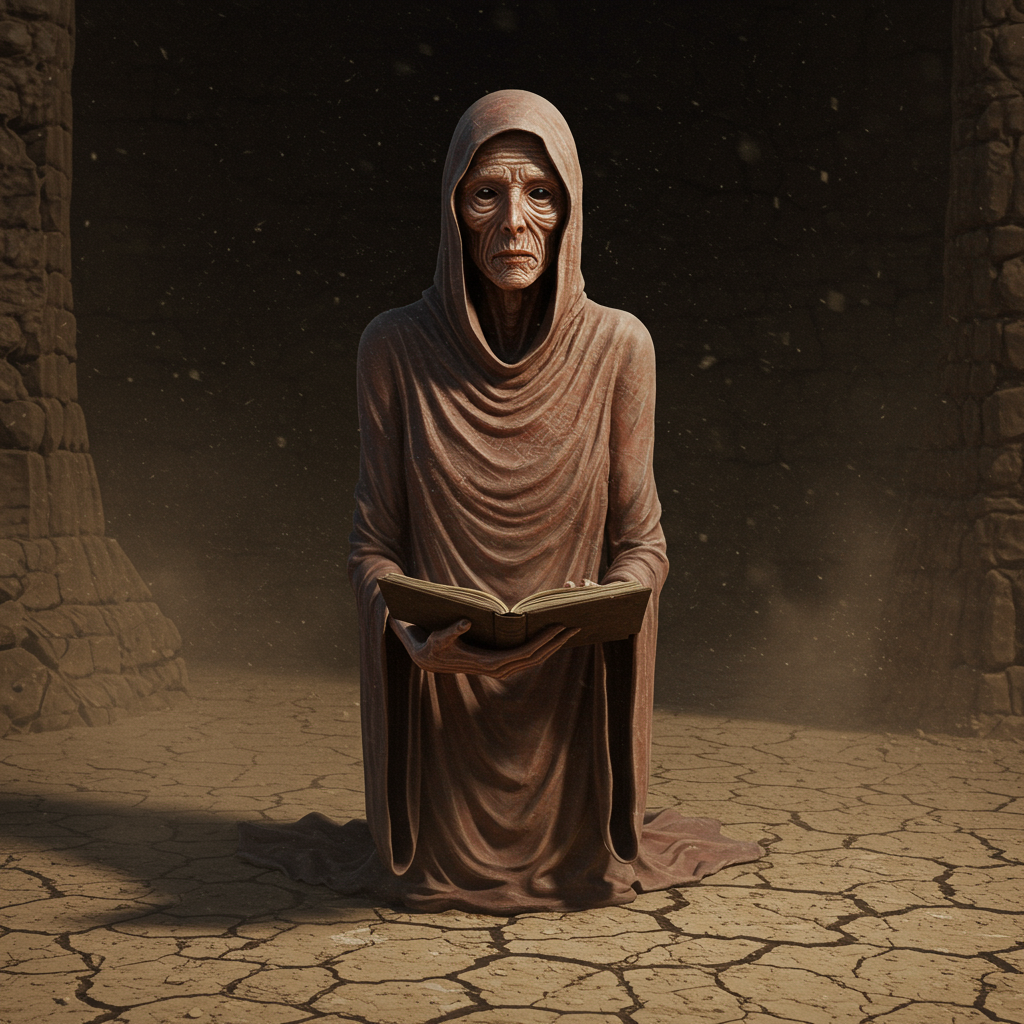

In [23]:
t = generate(p3)
t.show()